In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import pandas as pd

df = pd.read_csv('/content/Mental health Depression disorder Data.csv', index_col='index', low_memory=False)
df.head()

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
index,,,,,,,,,,
0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


In [ ]:
df.dtypes

Entity                        object
Code                          object
Year                          object
Schizophrenia (%)             object
Bipolar disorder (%)          object
Eating disorders (%)          object
Anxiety disorders (%)        float64
Drug use disorders (%)       float64
Depression (%)               float64
Alcohol use disorders (%)    float64
dtype: object

In [ ]:
df.duplicated().sum()


9718

In [ ]:
duplicated_data = df[df.duplicated(keep='first')==True]
duplicated_data.count()

Entity                       9718
Code                         9474
Year                         9718
Schizophrenia (%)               0
Bipolar disorder (%)            0
Eating disorders (%)         9718
Anxiety disorders (%)           0
Drug use disorders (%)          0
Depression (%)                  0
Alcohol use disorders (%)       0
dtype: int64

In [ ]:
# drop the duplicated rows, because in this analysis we don't need the duplicated datas.
df.drop_duplicates(keep='first', inplace=True)

In [ ]:
# check null values in df
df[df.isna().any(axis=1)==True]      # here the null value is also present in 'Code' column, but this column does not affect much in analysis.

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
index,,,,,,,,,,
112,Andean Latin America,NaN,1990,0.195471,0.870564,0.28782,4.217677,0.608921,2.621781,1.748912
113,Andean Latin America,NaN,1991,0.195484,0.870876,0.289362,4.220261,0.610489,2.631717,1.743910
114,Andean Latin America,NaN,1992,0.195497,0.871174,0.290563,4.222587,0.611990,2.639932,1.738703
115,Andean Latin America,NaN,1993,0.195523,0.871482,0.291833,4.224721,0.613995,2.646096,1.733697
116,Andean Latin America,NaN,1994,0.195569,0.871823,0.293111,4.226690,0.616448,2.651022,1.729266
...,...,...,...,...,...,...,...,...,...,...
108548,Zimbabwe,ZWE,2013,303564.60359,NaN,NaN,NaN,NaN,NaN,NaN
108549,Zimbabwe,ZWE,2014,311665.769283,NaN,NaN,NaN,NaN,NaN,NaN
108550,Zimbabwe,ZWE,2015,320638.507158,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# create a new dataframe named 'req_df' to clean dataframe more effectively.
req_headers = ['Entity', 'Year', 'Schizophrenia (%)', 'Bipolar disorder (%)',
       'Eating disorders (%)', 'Anxiety disorders (%)',
       'Drug use disorders (%)', 'Depression (%)',
       'Alcohol use disorders (%)']
req_df = df[req_headers]
req_df.head()

,Entity,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
index,,,,,,,,,
0,Afghanistan,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,Afghanistan,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,Afghanistan,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


In [ ]:
# cleaning the 'req_df' more
req_df.isna().any(axis=0).sum()             # checks the null value present in the row

7

In [ ]:
# drop null values from dataframe
req_df.dropna(axis=0, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
# check if any null values is still remaining 
req_df.isna().sum()

Entity                       0
Year                         0
Schizophrenia (%)            0
Bipolar disorder (%)         0
Eating disorders (%)         0
Anxiety disorders (%)        0
Drug use disorders (%)       0
Depression (%)               0
Alcohol use disorders (%)    0
dtype: int64

In [ ]:
# data_check stats

data_stats = pd.DataFrame({
    'Unique':df.nunique(),
    'null':df.isna().sum(),
    'null percent':(df.isna().sum())/len(df)*100,
    'Type':df.dtypes.values
})
        
data_stats

,Unique,null,null percent,Type
Entity,276,0,0.000000,object
Code,236,5168,5.228917,object
Year,259,0,0.000000,object
Schizophrenia (%),25661,72960,73.820003,object
Bipolar disorder (%),19358,79429,80.365255,object
Eating disorders (%),72657,8317,8.415035,object
Anxiety disorders (%),6457,92367,93.455760,float64
Drug use disorders (%),6435,92367,93.455760,float64
Depression (%),6460,92367,93.455760,float64
Alcohol use disorders (%),6459,92367,93.455760,float64


In [ ]:
# converting the datatype of object as per necessity
def convert_str_to_float(x):
    if type(x)!=float:
        if x[0] in ['0','1','2','3','4','5','6','7','8','9']:
            return float(x)
        return float(0)
    return x

for i in req_df.columns[2:]:
    req_df[i]=req_df[i].apply(convert_str_to_float)

<ipython-input-13-5b9dd877c234>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  req_df[i]=req_df[i].apply(convert_str_to_float)


In [ ]:
for i in req_df.columns[2:]:
    print(i)

Schizophrenia (%)
Bipolar disorder (%)
Eating disorders (%)
Anxiety disorders (%)
Drug use disorders (%)
Depression (%)
Alcohol use disorders (%)


In [ ]:
# Exploratory Data Analysis
"""
    EDA on the mean of every issue with respect to Entity & Year
"""

# grouped datas
nation_group_issue_avg = req_df.groupby('Entity', as_index = False).agg({'Schizophrenia (%)':'mean', 'Bipolar disorder (%)':'mean','Eating disorders (%)':'mean', 'Anxiety disorders (%)':'mean', 'Drug use disorders (%)':'mean', 'Depression (%)':'mean', 'Alcohol use disorders (%)':'mean'})

In [ ]:
for i in nation_group_issue_avg.columns[1:]:
    print(i)

Schizophrenia (%)
Bipolar disorder (%)
Eating disorders (%)
Anxiety disorders (%)
Drug use disorders (%)
Depression (%)
Alcohol use disorders (%)


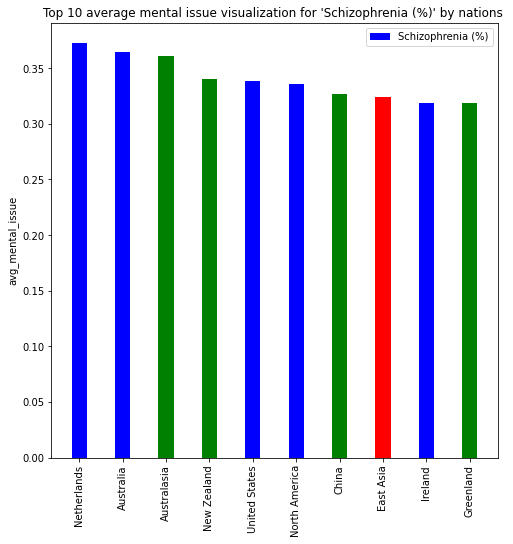

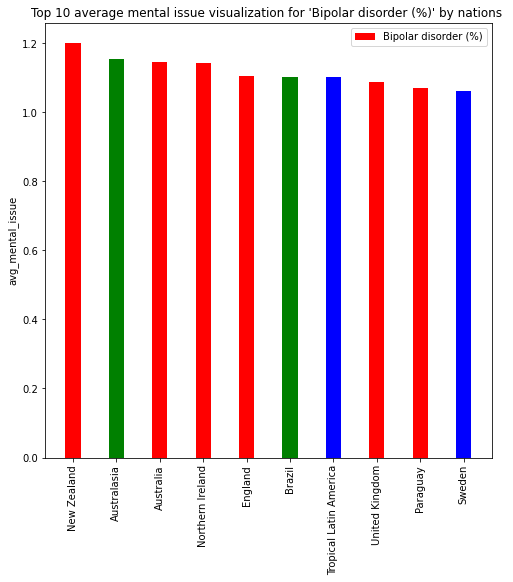

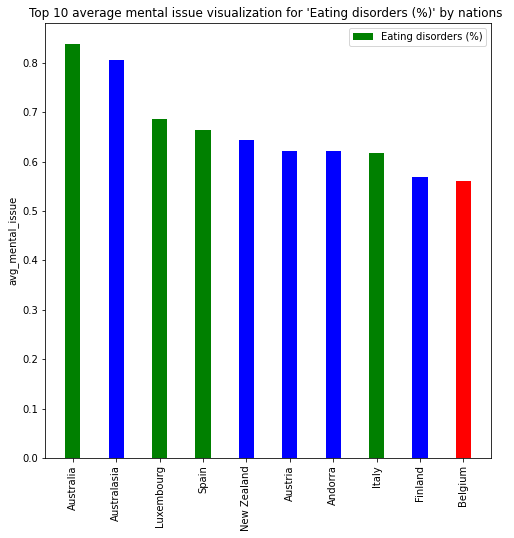

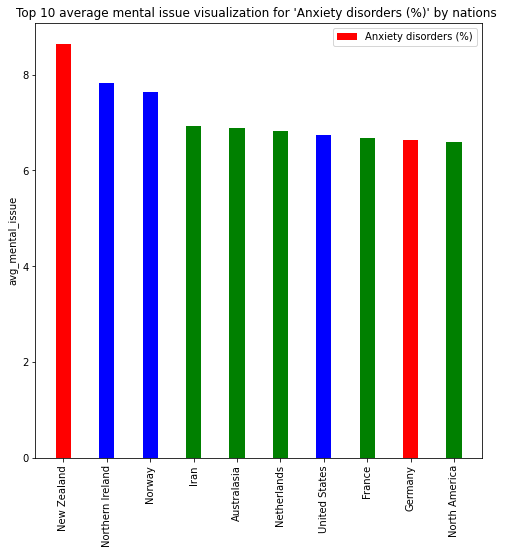

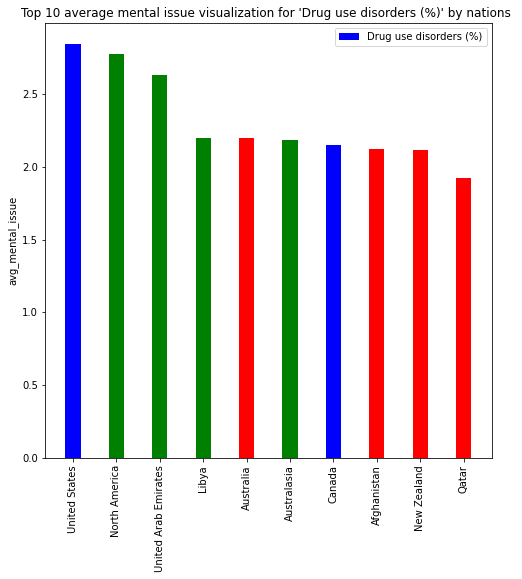

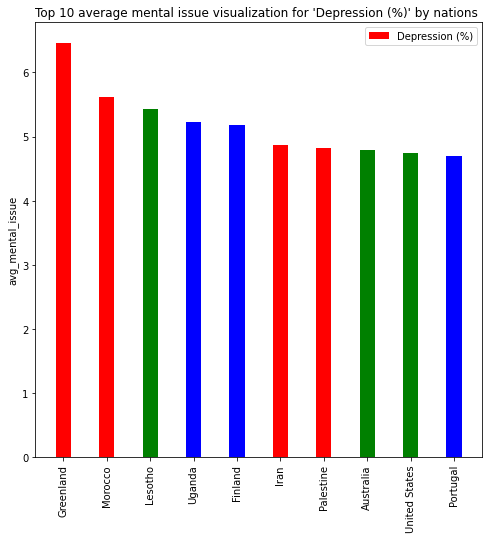

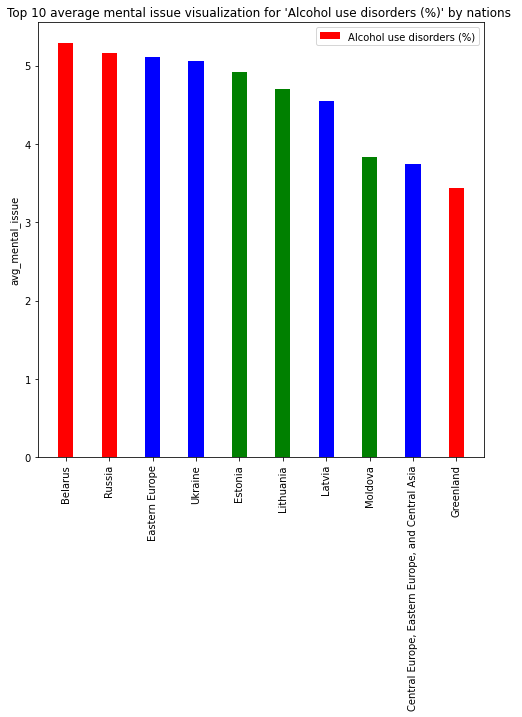

In [ ]:
import matplotlib.pyplot as plt
import random


colors = ['red', 'blue', 'green']


for i in nation_group_issue_avg.columns[1:]:
    top_10_nation_group_issue_avg = nation_group_issue_avg.sort_values(by=i, ascending=False).head(10)
    
    # generates the random colors for bars in the figure.
    bar_colors = []
    for j in range(20):
        bar_colors.append(random.choice(colors))
        
    fig, ax = plt.subplots(figsize=(8,8))
    ax.bar(top_10_nation_group_issue_avg['Entity'],top_10_nation_group_issue_avg[i] , width=0.35, label=i, color=bar_colors)
    
    ax.set_ylabel('avg_mental_issue')
    ax.set_title(f"Top 10 average mental issue visualization for '{i}' by nations ")
    plt.xticks(rotation=90)
    ax.legend()
    
    plt.show()
